[20220913]

# 0. Data Inspections

Brief inspections of the data.

## Goal
To check a summary of the data.
use 5 latest data as oot data.

## Plan
Checklist what will be done on the notebook :

        [ ] Create an identifier column (if not exist)
        [ ] Or Creating Datamart if there are many resources
        [ ] Columns and Rows Counts
        [ ] Target Descriptions
        [ ] Possible Variable
        [ ] Train and Test separation

In [27]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import ramal
from sklearn.preprocessing import StandardScaler
import joblib

In [8]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

# full_path = os.path.dirname(os.path.realpath(__file__))
full_path = globals()['_dh'][0]
folder_name = full_path.split('/')[-1]

PATH_RAW = config['path']['raw_wm']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
PATH_MODEL = config['path']['artifact']+folder_name+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [10]:
df_train = pd.read_csv(PATH_RAW+'train.csv')
df_features = pd.read_csv(PATH_RAW+'features.csv')

In [11]:
df_train.shape

(421570, 5)

In [12]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Check Identifier Column

Looking/Creating a column which seperate each rows.

In [13]:
df_train['ids'] = df_train['Store'].astype(str) + ':' + df_train['Dept'].astype(str)

In [14]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,ids
0,1,1,2010-02-05,24924.50,False,1:1
1,1,1,2010-02-12,46039.49,True,1:1
2,1,1,2010-02-19,41595.55,False,1:1
3,1,1,2010-02-26,19403.54,False,1:1
4,1,1,2010-03-05,21827.90,False,1:1


In [15]:
## check all dates

df_train.Date.unique()  ## weekly

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [16]:
df_train.groupby(['ids','Date'])['Weekly_Sales'].sum().unstack() #--> null in some weeks

Date,2010-02-05,2010-02-12,2010-02-19,2010-02-26,2010-03-05,2010-03-12,2010-03-19,2010-03-26,2010-04-02,2010-04-09,...,2012-08-24,2012-08-31,2012-09-07,2012-09-14,2012-09-21,2012-09-28,2012-10-05,2012-10-12,2012-10-19,2012-10-26
ids,,,,,,,,,,,,,,,,,,,,,
10:1,40212.84,67699.32,49748.33,33601.22,36572.44,36380.70,38252.33,51956.73,131853.01,89207.79,...,26804.84,26083.28,29426.33,30321.06,30872.22,31477.50,36323.95,40626.47,44224.36,58409.83
10:10,48027.87,50595.72,51199.72,50028.83,49892.15,48866.19,49479.06,45836.35,51518.98,44985.49,...,53363.39,51521.80,48221.99,47110.60,46756.39,47821.03,46511.89,48684.03,46947.21,43637.06
10:11,36705.57,31052.34,33224.65,29268.91,31934.99,30791.61,30518.98,26560.59,32200.72,33749.84,...,35093.15,32266.84,32102.45,24863.15,25421.80,23483.55,26447.16,25425.08,25507.61,25448.11
10:12,10365.86,9375.25,11032.90,11058.90,11033.07,9973.07,11762.04,10039.50,11058.16,11279.66,...,8888.64,8192.02,8770.35,7684.45,8649.56,8628.64,9423.35,9051.76,8245.89,9043.49
10:13,74020.63,69145.42,68060.96,71517.99,70279.43,67184.64,65575.03,62829.41,64994.46,64825.23,...,64019.57,58043.31,63844.99,61430.75,60853.20,56960.17,64940.04,61065.21,58976.21,61010.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:94,NaN,982.50,2163.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.62,NaN,158.98,3.88,23.28,233.02
9:95,23292.10,22317.38,20694.32,21780.08,22187.57,22367.35,20283.64,23791.40,26738.25,29242.85,...,35480.66,38096.64,39263.82,34591.81,33393.24,33119.87,35189.41,32072.80,34031.01,32382.05
9:96,2438.08,2304.09,1944.11,2423.55,2591.28,2922.80,2788.11,2632.94,3480.35,3591.49,...,3890.25,3961.14,4111.69,3284.82,3496.35,3763.21,4306.43,3675.99,3540.05,4752.25


In [17]:
df_train2 = df_train.groupby(['ids','Date'])['Weekly_Sales'].sum().unstack().fillna(0).stack().reset_index() #--> fillna with zeros
df_train2.columns = ['ids','Date','sales']

In [18]:
df_train2.head()

,ids,Date,sales
0,10:1,2010-02-05,40212.84
1,10:1,2010-02-12,67699.32
2,10:1,2010-02-19,49748.33
3,10:1,2010-02-26,33601.22
4,10:1,2010-03-05,36572.44


## Prepare The Timeseries with date features

In [19]:
df_feat2 = df_features[['Store','Date','Temperature','IsHoliday','Fuel_Price']]
df_feat2['Store'] = df_feat2['Store'].astype(str)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_train2['Store'] = df_train2['ids'].apply(lambda x : x.split(':')[0]).astype(str)
df_train3 = pd.merge(df_train2, df_feat2, on = ['Store','Date'], how = 'left')

In [21]:
df_train3.sample(10)

,ids,Date,sales,Store,Temperature,IsHoliday,Fuel_Price
173193,24:7,2010-06-25,39344.74,24,74.90,False,2.958
458152,8:3,2012-06-15,5585.39,8,77.14,False,3.393
261131,31:85,2010-05-07,1438.95,31,70.87,False,2.835
30387,12:8,2011-06-17,40974.76,12,86.84,False,3.935
122299,20:13,2010-10-01,62817.50,20,61.08,False,2.707
251255,30:94,2010-03-05,26360.26,30,48.61,False,2.625
167409,24:20,2011-12-30,5579.20,24,33.45,True,3.566
335837,39:38,2011-07-01,35588.27,39,84.93,False,3.524
397816,44:67,2012-08-24,897.84,44,77.37,False,3.582
110151,19:96,2010-11-19,13587.22,19,44.22,False,3.138


In [22]:
df_train3.shape

(476333, 7)

## Data Summary

In [23]:
hd_product = df_train3.groupby('ids')['sales'].sum().sort_values(ascending = False)

hd_product[:10]

ids
14:92    26101497.71
2:92     23572153.03
20:92    23542625.04
13:92    23170876.20
4:92     22789210.43
20:95    21537795.62
4:95     21054815.74
27:92    20952094.22
14:95    20655911.35
2:95     20533191.52
Name: sales, dtype: float64

In [24]:
len(hd_product)

3331

In [25]:
## Standardize for every product
# p_id = '4:92'

all_ss = {}
df_train4 = pd.DataFrame()
for p_id in df_train3.ids.unique():
    SS_fun = StandardScaler()
    df_temp1 = df_train3[df_train3.ids == p_id].sort_values('Date')
    X_tmp = df_temp1[['sales']].values
    SS_fun.fit(X_tmp[:-5])
    df_temp1['sales_ss'] = SS_fun.transform(X_tmp)
    df_train4 = df_train4.append(df_temp1)
    all_ss[p_id] = SS_fun

In [ ]:
# all_ss

joblib.dump(all_ss,PATH_MODEL+'ss_artf_iter3.pkl')

['../../artifacts/iteration_3/ss_artf_iter3.pkl']

In [18]:
# hd_product[:25].sample(8).index
product_focus =['3:38', '2:95', '1:92', '14:90', '10:72', '13:92', '31:92', '1:95']

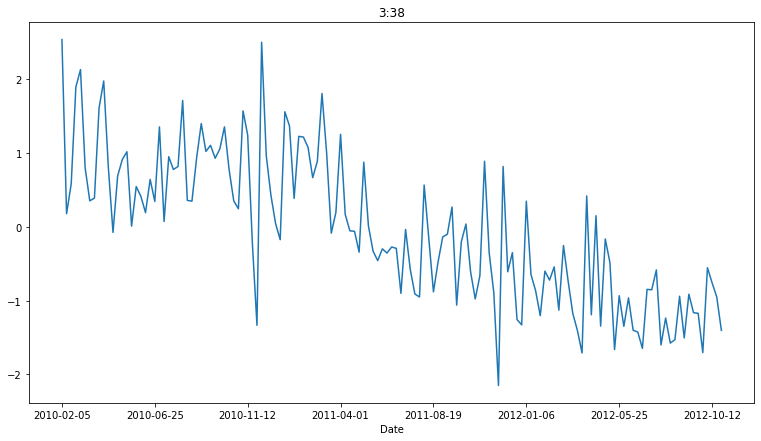

<Figure size 432x288 with 0 Axes>

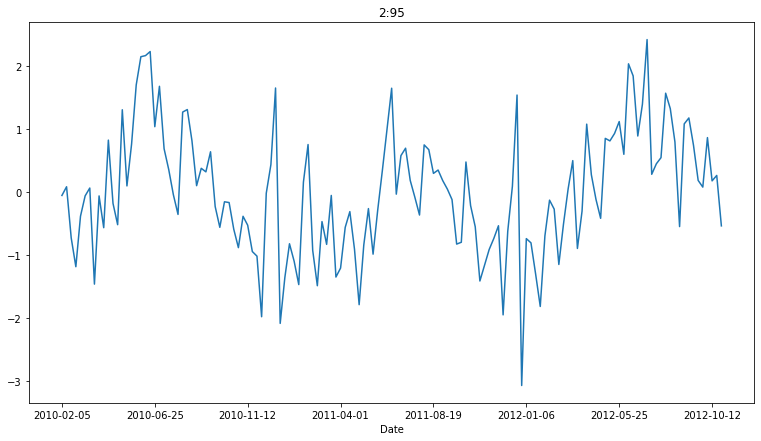

<Figure size 432x288 with 0 Axes>

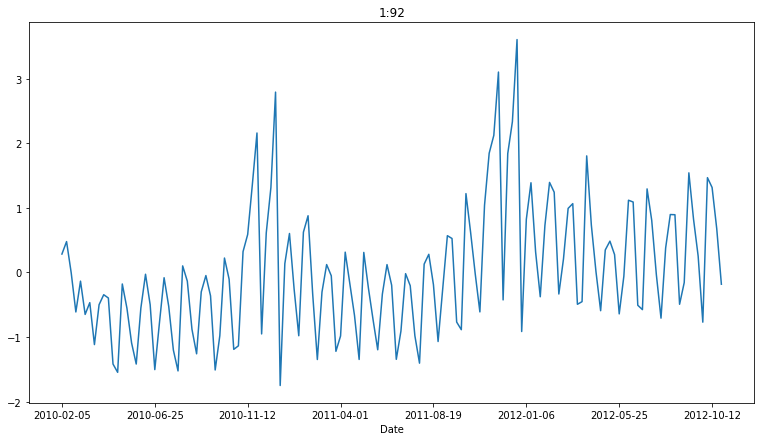

<Figure size 432x288 with 0 Axes>

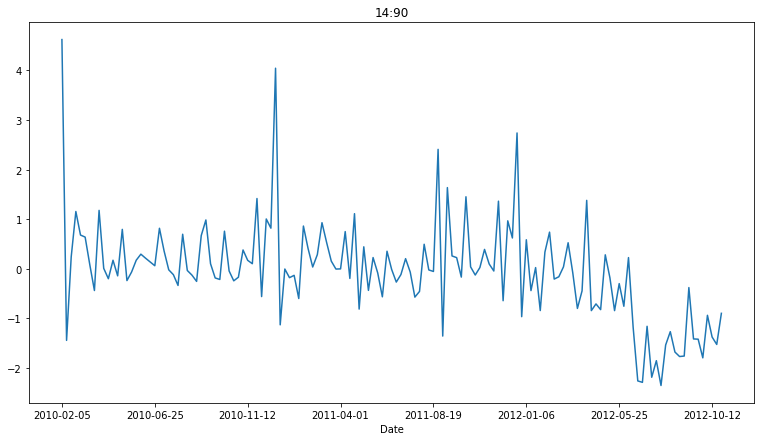

<Figure size 432x288 with 0 Axes>

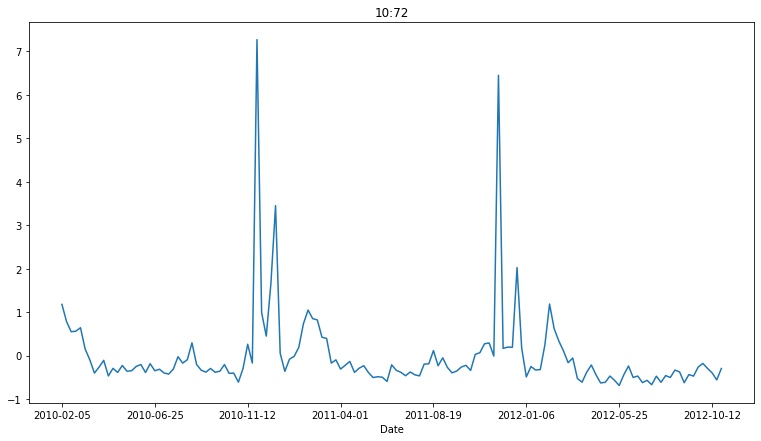

<Figure size 432x288 with 0 Axes>

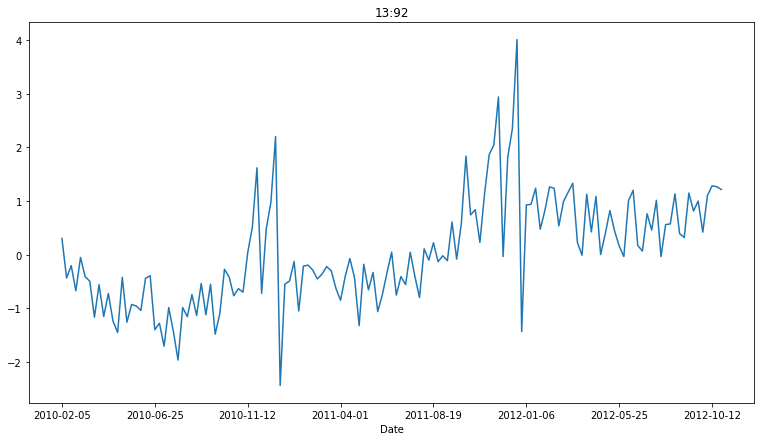

<Figure size 432x288 with 0 Axes>

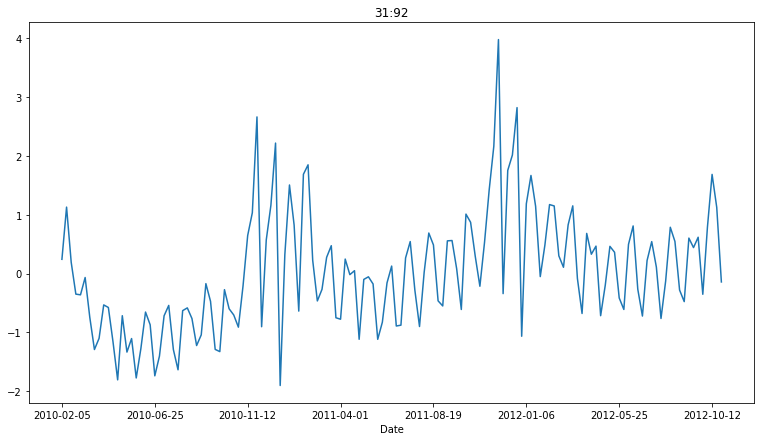

<Figure size 432x288 with 0 Axes>

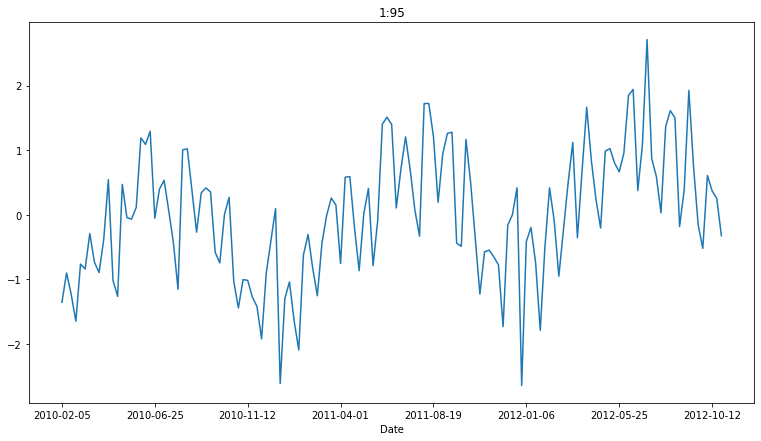

<Figure size 432x288 with 0 Axes>

In [32]:
for i in product_focus:
    plt.figure(figsize = (13,7))
    ramal.plot_per_product(df = df_train4, data_col = 'sales_ss', pr_id = i)
    plt.show()
    plt.clf()

## Save to Interim

Seperate the data (Train and Test) to interim folder

In [33]:
df_train4.to_csv(PATH_INTERIM+'data_focus_iter3.csv',index = False)

In [34]:
!pip install pycodestyle pycodestyle_magic


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
